# Homework 5 (100 Points)

For this homework we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [1]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

### Exercise 1: Data pre-processing (16 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`, and print the first five rows [2pt]

In [2]:
bikes = pd.read_csv('citibike.csv')
bikes.head(5)

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True


b) Check that there are no missing values in your dataset. If they are, take care of them appropriately [2pt]


In [3]:
# checking initial NaN
def num_nans(df):
    null_rows = sum([True for idx,row in df.iterrows() if any(row.isnull())])
    return null_rows

print("There are " +  str(num_nans(bikes)) + " rows with at least one empty value")

# Dropping the rows with nan values
bikes = bikes.dropna()
print("There are " +  str(num_nans(bikes)) + " rows with at least one empty value")

There are 3 rows with at least one empty value
There are 0 rows with at least one empty value


c) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays [4pt]

In [4]:
weekday_data = bikes[bikes.weekday==True]
weekend_data = bikes[bikes.weekday==False]

d) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [8pts]

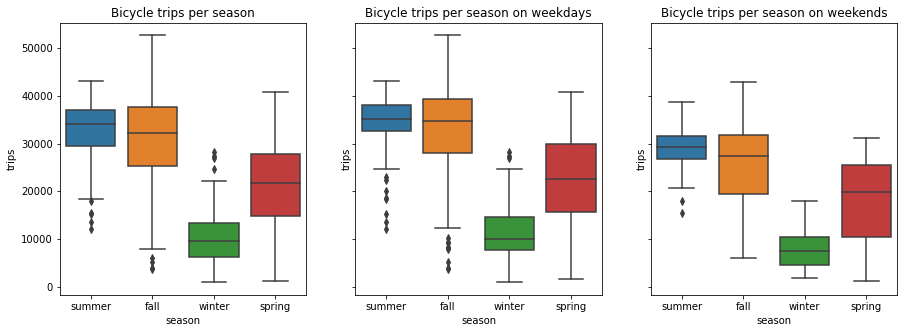

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.boxplot(ax=axes[0],x=bikes['season'], y = bikes['trips'])
axes[0].set_title('Bicycle trips per season')

sns.boxplot(ax=axes[1],x=weekday_data['season'], y = weekday_data['trips'])
axes[1].set_title('Bicycle trips per season on weekdays')

sns.boxplot(ax=axes[2],x=weekend_data['season'], y = weekend_data['trips'])
axes[2].set_title('Bicycle trips per season on weekends');

Yes, there is a difference in distribution of trips between seasons. One can observe considerably lower number of trips in winter as compared to summer and fall. The mean number of trips in summer is the highest, followed by fall and then spring. 

One can also observe a difference in the number of trips for every season between weekends and weekdays. This may be due to the fact that there are more number of days in weekdays than weekends. We see a higher median and a bigger interquartile range of the boxplots for every season in weekdays than compared to weekdays, possibly due to increased variability. 

## Exercise 2: Qualitative predictors (18 pts)

The Season variable is an example of what’s called a categorical predictor. This problem gets to fit a model with a qualitative predictor and to interpret the findings.

a) Fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. Use your weekdays dataset [4pt]


In [6]:
import statsmodels.formula.api as smf

In [7]:
results = smf.ols('trips ~ C(season)', data=weekday_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     261.4
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.07e-108
Time:                        23:34:35   Log-Likelihood:                -6333.7
No. Observations:                 608   AIC:                         1.268e+04
Df Residuals:                     604   BIC:                         1.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.353e+04    

b) How many total coefficients are there in the model? What does each coefficient correspond to? [4pt]

There are 4 coefficients in total. Intercept is the value of the intercept that corresponds to b in ‘y = m1x1 + m2x2 + m3x3 + b’. In this particular case, the intercept represents the average trips for fall season. For the other coefficients like season(T.spring), season(T.summer) and season(T.winter), they represent the slope of the equation. It is denoted by m1, m2 and m3 respectively. x represents the predictor variable, in this case, it is the one-hot encoding of the season. 

We also see that not all the categorical variable are present as coefficients, as we are missing season(T.fall). When a regression model is built using a categorical variable with N levels, it only considers N-1 levels, as the remaining level is used as a reference by the model. In this case, season(T.fall) is the reference. What this means to your model as a whole is that, each level (when remaining variables remain same) is compared to the reference level.

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [4pt]

The intercept represents the average trips for fall season. For the other coefficients like season(T.spring), season(T.summer) and season(T.winter), it represents difference in average trips of the season against average trips in fall. With reference to the number of average trips in fall season (intercept=3.353e+04 ), we can see that the average number of trips in spring is decreasing by -1.096e+04, summer is increasing by 918.6325 and winter is decreasing by -2.231e+04. 

d) Repeat a) -> c) with your weekends dataset. What difference can you see? [6pt]

In [8]:
results = smf.ols('trips ~ season', data=weekend_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           4.01e-43
Time:                        23:34:36   Log-Likelihood:                -2468.5
No. Observations:                 241   AIC:                             4945.
Df Residuals:                     237   BIC:                             4959.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           2.6e+04    785.775  

We observe that the same coefficients exist but they all have different values. The average number of trips in the fall season decreased to 2.6e+04. We can notice that difference between spring and fall and winter and fall have decreased as well. The difference between summer and fall has increased in the weekends. It shows that people make more number of bicycle trips in summer than in fall in weekends. 

## Exercise 3: Multiple linear regression (16 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [4pt]


In [9]:
results = smf.ols(formula='trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + C(month)', data=weekday_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     167.6
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          2.49e-207
Time:                        23:34:37   Log-Likelihood:                -6066.4
No. Observations:                 608   AIC:                         1.217e+04
Df Residuals:                     591   BIC:                         1.224e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -240.0502   1272.748     

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [4pt]

The response variable decreases as snow_depth, snowfall, min_temperature and precipitation increase, with precipitation being the highest as no one wants to cycle during the rain, or in the cold with snow. The response variable increases with max_temperature. A higher chance is that people go on bicycle trips during the warm weather. 

The coefficients during the cold months like Dec, Jan, Feb, Mar are the smallest. The coefficients are a bit higher in the months of Apr, May, Jun, Jul, Aug than in the cold months. The coefficients are the highest in Sept, Oct and Nov.

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [4pt]

In [10]:
results = smf.ols(formula='trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + C(month) + stations_in_service', data=weekday_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     243.1
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.08e-253
Time:                        23:34:38   Log-Likelihood:                -5954.3
No. Observations:                 608   AIC:                         1.194e+04
Df Residuals:                     590   BIC:                         1.202e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.453e+04   1

stations_in_service was added as another predictor. I tried some other features that were not included but station_in_service resulted in a big improvement in the R-squared. The reason this worked is because more people would cycle if there are more docking stations that are working per day. Yes, this made a difference as the R-squared of the model improved significantly (0.875) compared to the previous model (0.819). 

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

Predictors associated with increased ridership are stations_in_service, max_tempearure. Predictors associated with decreased ridership are snow_depth, min_temperature, precipitation. As month is a categorical variable, all coefficients are indicating difference with respect to reference month (Jan). 

e) Which predictors are statistically significant (95% confidence level)? [2pt]

To know which predictors are statistically significant, we need to look at the P>|t| to be less than 0.05. This indicates that there is a 5% chance the variable has no affect on the dependent variable, and our results are produced by chance. 

The predictors which are statistically significant are the intercept, Months of Apr, May, Jun, Jul, Aug, Sept, Oct, Nov; snow_depth, max_temperature, precipitation and stations_in_service. 

## Exercise 4: Dealing with collinearity (12 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. [2pt]


In [11]:
df_selected= weekday_data[['snow_depth','snowfall','min_temperature','max_temperature','precipitation']]
df_month = pd.get_dummies(weekday_data.month, prefix='month')


df_final = df_selected.join(df_month)


correlation_matrix = df_final.corr()
correlated_features = set()
threshold = 0.7

for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]+' and '+correlation_matrix.columns[j]
            correlated_features.add(colname)
            
correlated_features 

{'max_temperature and min_temperature', 'month_2 and snow_depth'}

b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

Referring to 4a, the high correlation cut-off that was chosen is 0.7. max_temperature and min_temperature are highly correlated with each other and so is the month of Feb and the snow_depth considering the winter. 

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [4pt]

In [12]:
results = smf.ols(formula='trips ~ snow_depth + snowfall + min_temperature + precipitation + C(month)', data=weekday_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.36e-195
Time:                        23:34:40   Log-Likelihood:                -6097.0
No. Observations:                 608   AIC:                         1.223e+04
Df Residuals:                     592   BIC:                         1.230e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5334.3662   1113.633     

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [4pt]

Referring to 4c, the coefficient of min_temperature is 301.7059. It is very different from the temperature coefficient in 3a = -42.3781. Yes, the coefficient is statistically significant. As max and min temperature were highly correlated, the regression should not use both the inputs as features. Hence, by dropping one has improved the coefficient and statistical significance as well. 

## Exercise 5: Exploring different models (38 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [4pts]

R2 for model =  0.20145287400821954


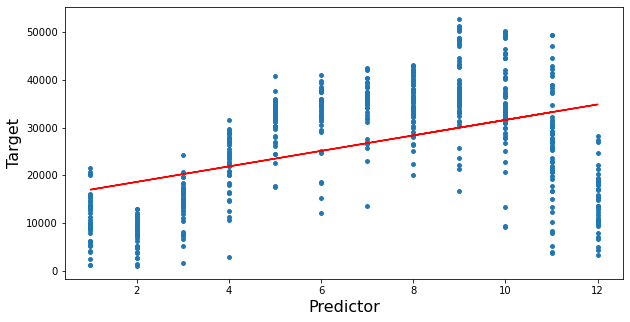

In [13]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np 

x = np.asarray(weekday_data['month'].tolist()).reshape(-1,1)

y = np.asarray(weekday_data['trips'].tolist()).reshape(-1,1)

# Training Model
lm=LinearRegression()
reg = lm.fit(x.reshape(-1,1),y.reshape(-1,1))
print('R2 for model = ',reg.score(x,y))
y_pred = reg.predict(x)
# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

No, linear relationship is not a good way to model bikeshare count with month as the count increases in the months of Sept, Oct, Nov but decreases in the month of Dec. There is no linear relationship between bikeshare count and month. Hence, polynomial regression should be tried to fit the data. 

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [8pts]

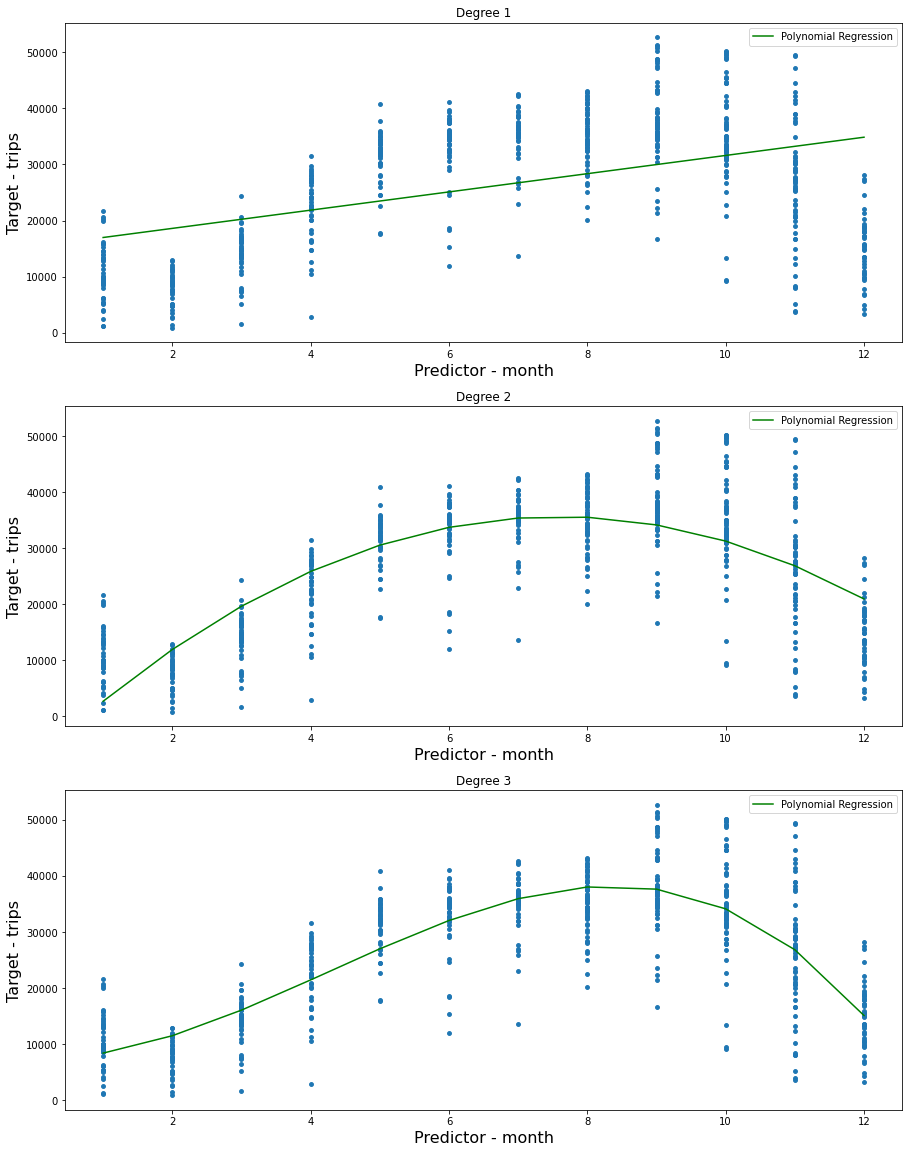

In [14]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline


# Data
x = np.asarray(weekday_data['month'].tolist()).reshape(-1,1)
y = np.asarray(weekday_data['trips'].tolist()).reshape(-1,1)

# space for subplots
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(15, 20))

### Degree 1
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax1.scatter(x,y,s=15)
ax1.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax1.set_title('Degree 1')
ax1.set_xlabel('Predictor - month',fontsize=16)
ax1.set_ylabel('Target - trips',fontsize=16)
ax1.legend();

### Degree 2
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax2.scatter(x,y,s=15)
ax2.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax2.set_title('Degree 2')
ax2.set_xlabel('Predictor - month',fontsize=16)
ax2.set_ylabel('Target - trips',fontsize=16)
ax2.legend();

### Degree 3
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax3.scatter(x,y,s=15)
ax3.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

ax3.set_title('Degree 3')
ax3.set_xlabel('Predictor - month',fontsize=16)
ax3.set_ylabel('Target - trips',fontsize=16)
ax3.legend();



In [15]:
mod_x1 = smf.ols(formula='trips ~ month ', data=weekday_data).fit()
print(mod_x1.summary())

mod_x2 = smf.ols(formula='trips ~ month + I(month**2)', data=weekday_data).fit()
print(mod_x2.summary())

mod_x3 = smf.ols(formula='trips ~ month + I(month**2)+I(month**3) ', data=weekday_data).fit()
print(mod_x3.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.79e-31
Time:                        23:34:42   Log-Likelihood:                -6518.3
No. Observations:                 608   AIC:                         1.304e+04
Df Residuals:                     606   BIC:                         1.305e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.536e+04   1016.145     15.111      0.0

R2 of 0.671 is the highest in the polynomial degree 3 (cubic) for modeling trips based on months as a predictor. 

As one keeps increasing the degree of the linear model, one will be able to better approximate more complex functions. It is logical that you got better approximation with higher degree. But the case that degree 3 will give you the better approximation all the time doesn't hold true.

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [16pts]


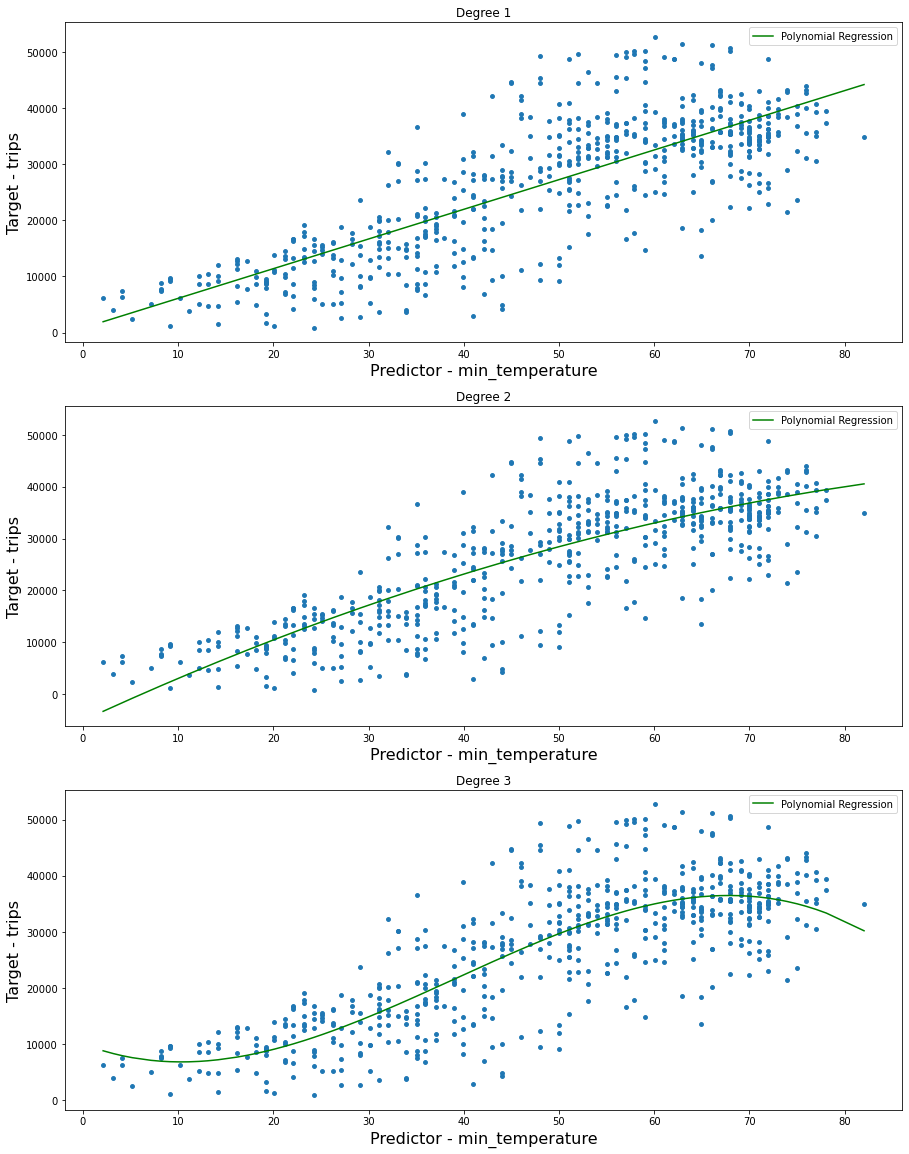

In [16]:
### trips ~ min_temperature

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline


# Data
x = np.asarray(weekday_data['min_temperature'].tolist()).reshape(-1,1)
y = np.asarray(weekday_data['trips'].tolist()).reshape(-1,1)

# space for subplots
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(15, 20))

### Degree 1
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax1.scatter(x,y,s=15)
ax1.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax1.set_title('Degree 1')
ax1.set_xlabel('Predictor - min_temperature',fontsize=16)
ax1.set_ylabel('Target - trips',fontsize=16)
ax1.legend();

### Degree 2
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax2.scatter(x,y,s=15)
ax2.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax2.set_title('Degree 2')
ax2.set_xlabel('Predictor - min_temperature',fontsize=16)
ax2.set_ylabel('Target - trips',fontsize=16)
ax2.legend();

### Degree 3
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax3.scatter(x,y,s=15)
ax3.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

ax3.set_title('Degree 3')
ax3.set_xlabel('Predictor - min_temperature',fontsize=16)
ax3.set_ylabel('Target - trips',fontsize=16)
ax3.legend();

In [17]:
mod_x1 = smf.ols(formula='trips ~ min_temperature ', data=weekday_data).fit()
print(mod_x1.summary())

mod_x2 = smf.ols(formula='trips ~ min_temperature + I(min_temperature**2)', data=weekday_data).fit()
print(mod_x2.summary())

mod_x3 = smf.ols(formula='trips ~ min_temperature + I(min_temperature**2)+I(min_temperature**3) ', data=weekday_data).fit()
print(mod_x3.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     1035.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.24e-133
Time:                        23:34:43   Log-Likelihood:                -6283.8
No. Observations:                 608   AIC:                         1.257e+04
Df Residuals:                     606   BIC:                         1.258e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         806.4279    858.391     

R2 of 0.669 is the highest in the polynomial degree 3 (cubic) for modeling trips based on min_temperature as a predictor. The R2 of other models i.e., degree 1 and 2 are not very far behind in terms of R2 (0.631 and 0.64 respectively) and similar to degree 3, but degree 3 does perform the best. 


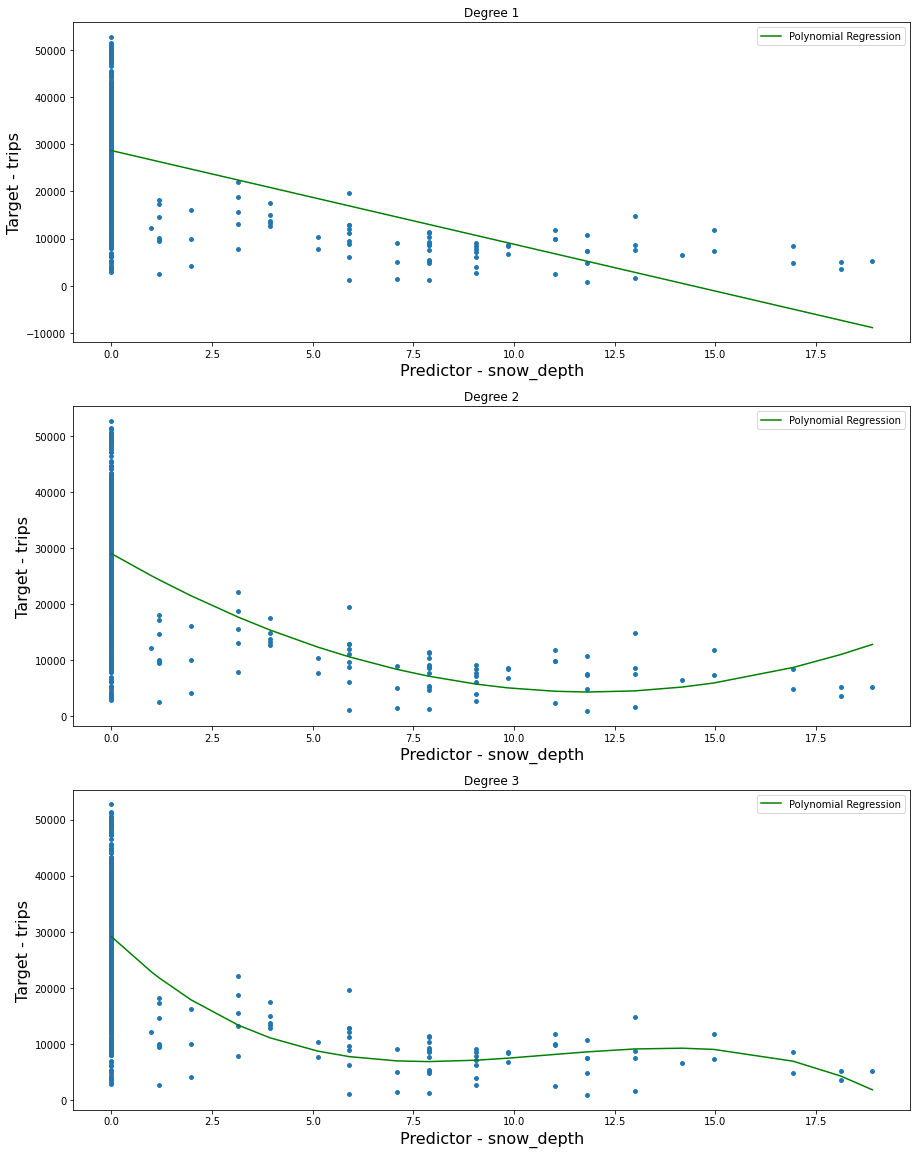

In [18]:
### trips ~ snow_depth

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline


# Data
x = np.asarray(weekday_data['snow_depth'].tolist()).reshape(-1,1)
y = np.asarray(weekday_data['trips'].tolist()).reshape(-1,1)

# space for subplots
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(15, 20))

### Degree 1
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax1.scatter(x,y,s=15)
ax1.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax1.set_title('Degree 1')
ax1.set_xlabel('Predictor - snow_depth',fontsize=16)
ax1.set_ylabel('Target - trips',fontsize=16)
ax1.legend();

### Degree 2
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax2.scatter(x,y,s=15)
ax2.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax2.set_title('Degree 2')
ax2.set_xlabel('Predictor - snow_depth',fontsize=16)
ax2.set_ylabel('Target - trips',fontsize=16)
ax2.legend();

### Degree 3
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax3.scatter(x,y,s=15)
ax3.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

ax3.set_title('Degree 3')
ax3.set_xlabel('Predictor - snow_depth',fontsize=16)
ax3.set_ylabel('Target - trips',fontsize=16)
ax3.legend();

In [19]:
mod_x1 = smf.ols(formula='trips ~ snow_depth ', data=weekday_data).fit()
print(mod_x1.summary())

mod_x2 = smf.ols(formula='trips ~ snow_depth + I(snow_depth**2)', data=weekday_data).fit()
print(mod_x2.summary())

mod_x3 = smf.ols(formula='trips ~ snow_depth + I(snow_depth**2)+I(snow_depth**3) ', data=weekday_data).fit()
print(mod_x3.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     199.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           2.31e-39
Time:                        23:34:44   Log-Likelihood:                -6500.2
No. Observations:                 608   AIC:                         1.300e+04
Df Residuals:                     606   BIC:                         1.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.864e+04    454.558     63.012      0.0

R2 of 0.293 is the highest in the polynomial degree 3 (cubic) for modeling trips based on snow_depth as a predictor. The R2 of model degree=2 is not very far behind in terms of R2 (0.283) and similar to degree 3, but degree 3 does perform the best. The R2 is not very high as polynomial regression also doesn't provide the best fit to model the snow_depth data, hence the low R2 value. Majority of the trips are done when snow_depth is zero, and hence there is a skew in the data. 

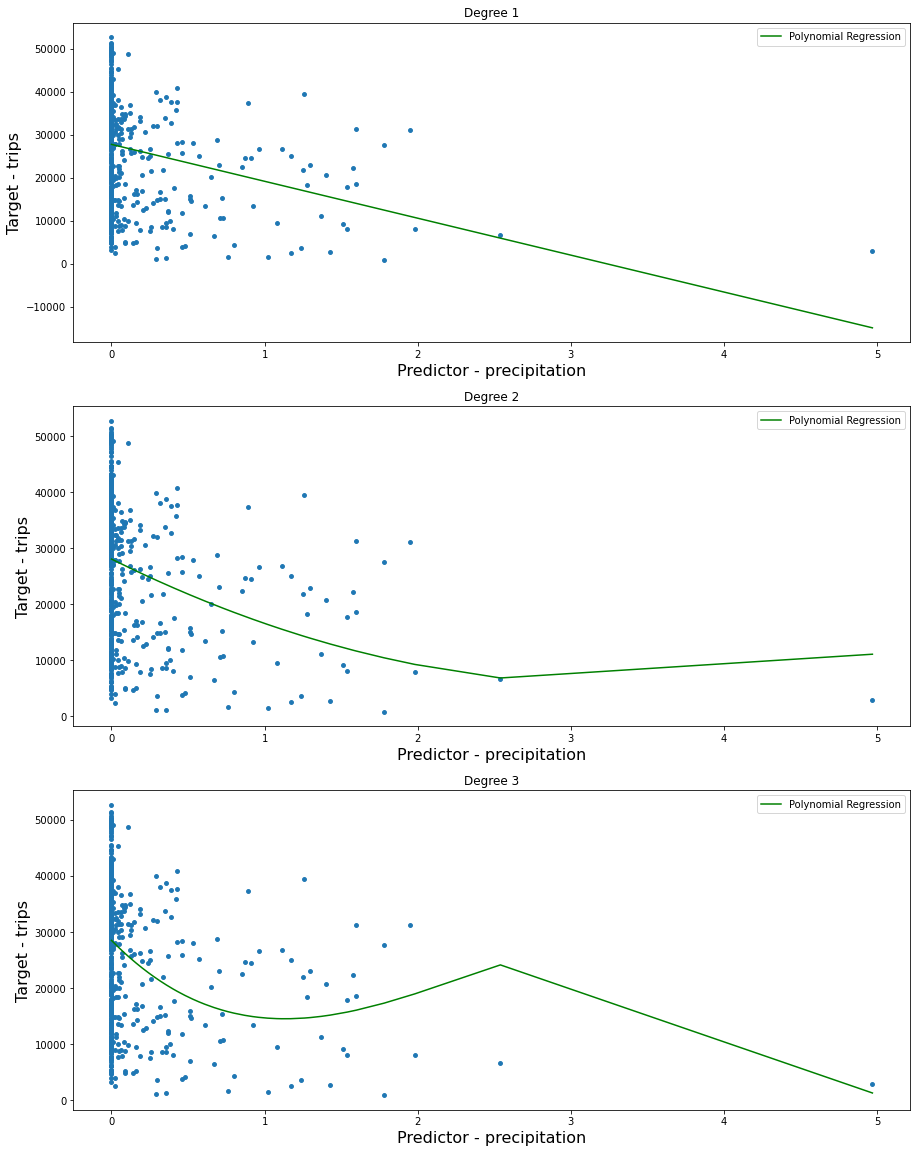

In [20]:
### trips ~ precipitation

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline


# Data
x = np.asarray(weekday_data['precipitation'].tolist()).reshape(-1,1)
y = np.asarray(weekday_data['trips'].tolist()).reshape(-1,1)

# space for subplots
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(15, 20))

### Degree 1
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax1.scatter(x,y,s=15)
ax1.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax1.set_title('Degree 1')
ax1.set_xlabel('Predictor - precipitation',fontsize=16)
ax1.set_ylabel('Target - trips',fontsize=16)
ax1.legend();

### Degree 2
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax2.scatter(x,y,s=15)
ax2.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax2.set_title('Degree 2')
ax2.set_xlabel('Predictor - precipitation',fontsize=16)
ax2.set_ylabel('Target - trips',fontsize=16)
ax2.legend();

### Degree 3
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax3.scatter(x,y,s=15)
ax3.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

ax3.set_title('Degree 3')
ax3.set_xlabel('Predictor - precipitation',fontsize=16)
ax3.set_ylabel('Target - trips',fontsize=16)
ax3.legend();

In [21]:
mod_x1 = smf.ols(formula='trips ~ precipitation ', data=weekday_data).fit()
print(mod_x1.summary())

mod_x2 = smf.ols(formula='trips ~ precipitation + I(precipitation**2)', data=weekday_data).fit()
print(mod_x2.summary())

mod_x3 = smf.ols(formula='trips ~ precipitation + I(precipitation**2)+I(precipitation**3) ', data=weekday_data).fit()
print(mod_x3.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     46.04
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           2.77e-11
Time:                        23:34:45   Log-Likelihood:                -6564.4
No. Observations:                 608   AIC:                         1.313e+04
Df Residuals:                     606   BIC:                         1.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.776e+04    507.285     54.718

R2 of 0.098 is the highest in the polynomial degree 3 (cubic) for modeling trips based on precipitation as a predictor. The R2 of model degree=2 is not very far behind in terms of R2 (0.082) and similar to degree 3, but degree 3 does perform the best. The R2 of model degree=1 is 0.071. The R2 is very poor as polynomial regression doesn't provide the best fit to model the snow_depth data, hence the low R2 value. Majority of the trips are done when precipitation is zero, and hence there is a skew in the data.

In all the three cases, i.e., trips ~ min_temperature, trips ~ snow_depth and trips ~ precipitation, we observe that R2 for model degree=3 has the best score. 

As one keeps increasing the degree of the linear model,one will be able to better approximate more complex functions. It is logical that you got better approximation with higher degree. But the case that degree 3 will give you the better approximation all the time doesn't hold true.

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [10pts]

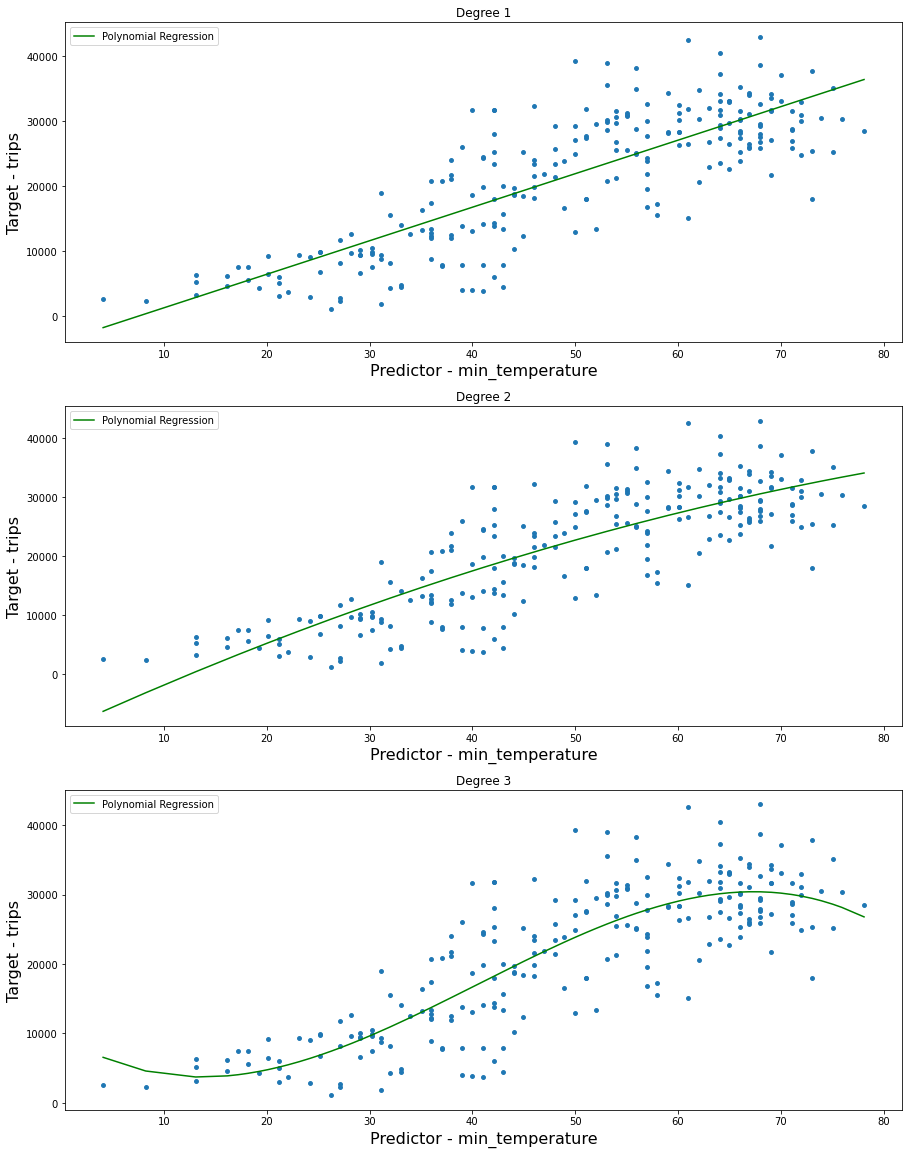

In [22]:
### trips ~ min_temperature

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline


# Data
x = np.asarray(weekend_data['min_temperature'].tolist()).reshape(-1,1)
y = np.asarray(weekend_data['trips'].tolist()).reshape(-1,1)

# space for subplots
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(15, 20))

### Degree 1
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax1.scatter(x,y,s=15)
ax1.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax1.set_title('Degree 1')
ax1.set_xlabel('Predictor - min_temperature',fontsize=16)
ax1.set_ylabel('Target - trips',fontsize=16)
ax1.legend();

### Degree 2
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax2.scatter(x,y,s=15)
ax2.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax2.set_title('Degree 2')
ax2.set_xlabel('Predictor - min_temperature',fontsize=16)
ax2.set_ylabel('Target - trips',fontsize=16)
ax2.legend();

### Degree 3
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax3.scatter(x,y,s=15)
ax3.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

ax3.set_title('Degree 3')
ax3.set_xlabel('Predictor - min_temperature',fontsize=16)
ax3.set_ylabel('Target - trips',fontsize=16)
ax3.legend();

In [23]:
mod_x1 = smf.ols(formula='trips ~ min_temperature ', data=weekend_data).fit()
print(mod_x1.summary())

mod_x2 = smf.ols(formula='trips ~ min_temperature + I(min_temperature**2)', data=weekend_data).fit()
print(mod_x2.summary())

mod_x3 = smf.ols(formula='trips ~ min_temperature + I(min_temperature**2)+I(min_temperature**3) ', data=weekend_data).fit()
print(mod_x3.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     481.6
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           3.31e-59
Time:                        23:34:46   Log-Likelihood:                -2437.0
No. Observations:                 241   AIC:                             4878.
Df Residuals:                     239   BIC:                             4885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3943.3491   1219.155     

In the weekends dataset, R2 of 0.707 is the highest in the polynomial degree 3 (cubic) for modeling trips based on min_temperature as a predictor. The R2 of other models i.e., degree 1 and 2 are not very far behind in terms of R2 (0.668 and 0.675 respectively) and similar to degree 3, but degree 3 does perform the best. 

In the weekdays dataset, R2 of 0.669 is the highest in the polynomial degree 3 (cubic) for modeling trips based on min_temperature as a predictor. The R2 of other models i.e., degree 1 and 2 are not very far behind in terms of R2 (0.631 and 0.64 respectively) and similar to degree 3, but degree 3 does perform the best. 

There is a slight difference in the R2 between the weekend and the weekday dataset, with the R2 in the weekday dataset being higher, but it is not very high. 

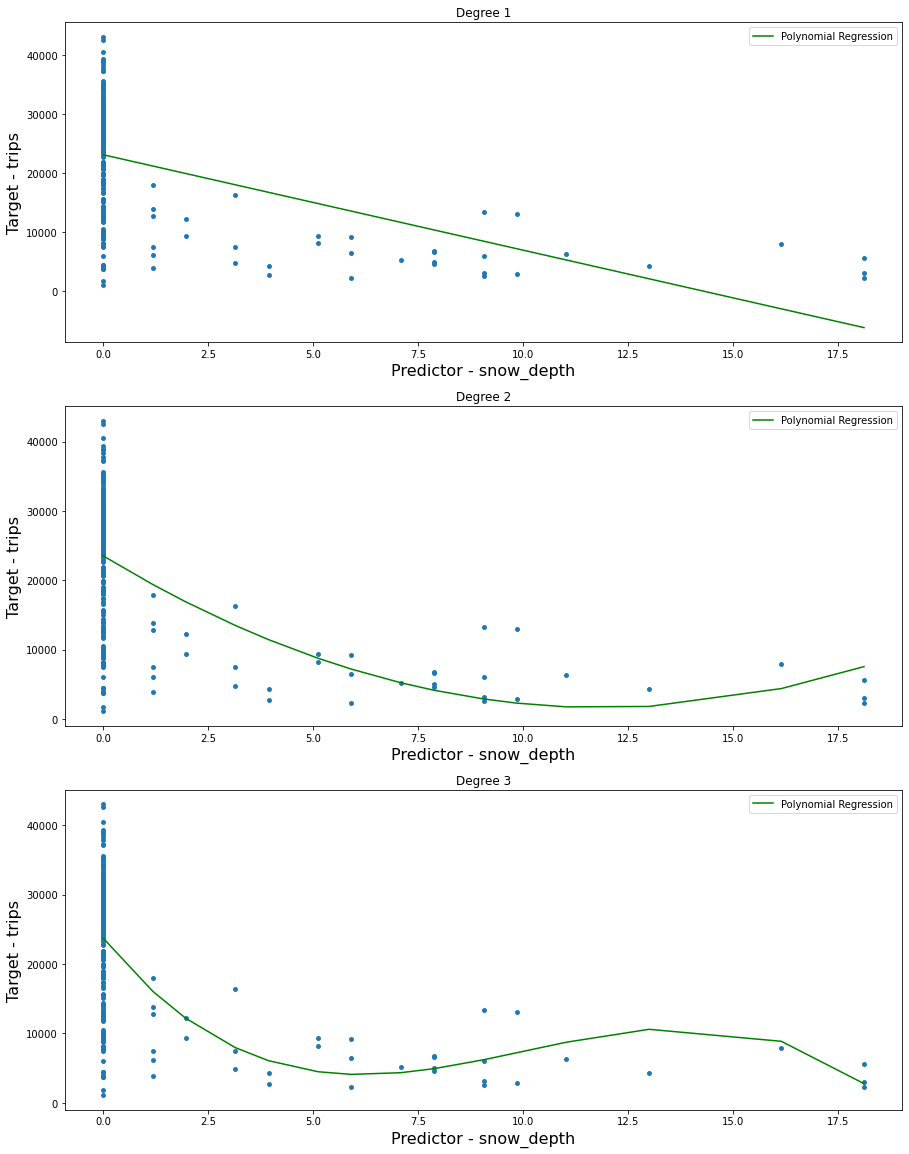

In [24]:
### trips ~ snow_depth

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline


# Data
x = np.asarray(weekend_data['snow_depth'].tolist()).reshape(-1,1)
y = np.asarray(weekend_data['trips'].tolist()).reshape(-1,1)

# space for subplots
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(15, 20))

### Degree 1
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax1.scatter(x,y,s=15)
ax1.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax1.set_title('Degree 1')
ax1.set_xlabel('Predictor - snow_depth',fontsize=16)
ax1.set_ylabel('Target - trips',fontsize=16)
ax1.legend();

### Degree 2
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax2.scatter(x,y,s=15)
ax2.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax2.set_title('Degree 2')
ax2.set_xlabel('Predictor - snow_depth',fontsize=16)
ax2.set_ylabel('Target - trips',fontsize=16)
ax2.legend();

### Degree 3
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax3.scatter(x,y,s=15)
ax3.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

ax3.set_title('Degree 3')
ax3.set_xlabel('Predictor - snow_depth',fontsize=16)
ax3.set_ylabel('Target - trips',fontsize=16)
ax3.legend();

In [25]:
mod_x1 = smf.ols(formula='trips ~ snow_depth ', data=weekend_data).fit()
print(mod_x1.summary())

mod_x2 = smf.ols(formula='trips ~ snow_depth + I(snow_depth**2)', data=weekend_data).fit()
print(mod_x2.summary())

mod_x3 = smf.ols(formula='trips ~ snow_depth + I(snow_depth**2)+I(snow_depth**3) ', data=weekend_data).fit()
print(mod_x3.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     73.93
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.08e-15
Time:                        23:34:47   Log-Likelihood:                -2537.5
No. Observations:                 241   AIC:                             5079.
Df Residuals:                     239   BIC:                             5086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.308e+04    615.677     37.491      0.0

In the weekend dataset, R2 of 0.315 is the highest in the polynomial degree 3 (cubic) for modeling trips based on snow_depth as a predictor. R2 of model degree=2 is 0.29 followed by R2 of model degree=1 as 0.236. The R2 is not very high as polynomial regression also doesn't provide the best fit to model the snow_depth data, hence the low R2 value.

In the weekday dataset, R2 of 0.293 is the highest in the polynomial degree 3 (cubic) for modeling trips based on snow_depth as a predictor. The R2 of model degree=2 is not very far behind in terms of R2 (0.283) and similar to degree 3, but degree 3 does perform the best. 

There is a slight difference in the R2 between the weekend and the weekday dataset, with the R2 in the weekday dataset being higher, but it is not very high. 

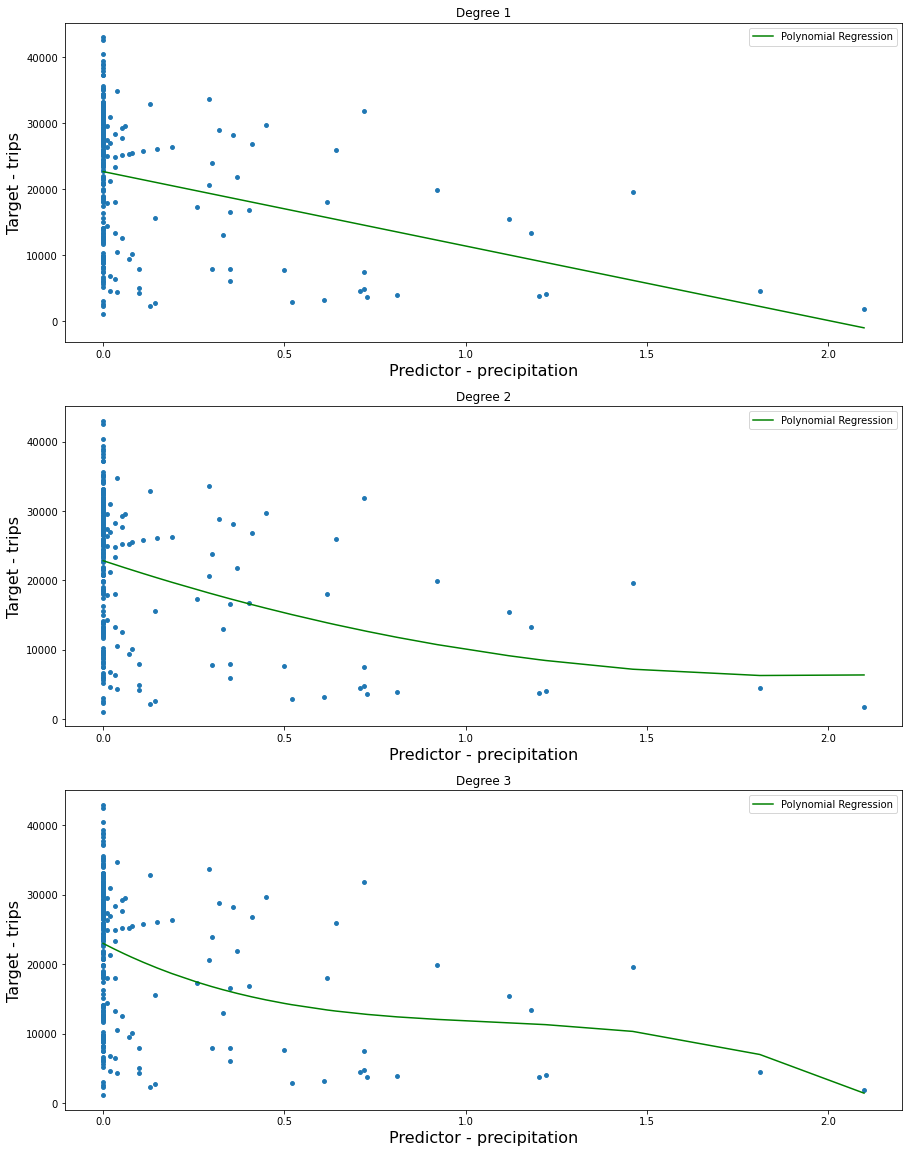

In [26]:
### trips ~ precipitation

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline


# Data
x = np.asarray(weekend_data['precipitation'].tolist()).reshape(-1,1)
y = np.asarray(weekend_data['trips'].tolist()).reshape(-1,1)

# space for subplots
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(15, 20))

### Degree 1
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=1)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax1.scatter(x,y,s=15)
ax1.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax1.set_title('Degree 1')
ax1.set_xlabel('Predictor - precipitation',fontsize=16)
ax1.set_ylabel('Target - trips',fontsize=16)
ax1.legend();

### Degree 2
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax2.scatter(x,y,s=15)
ax2.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
ax2.set_title('Degree 2')
ax2.set_xlabel('Predictor - precipitation',fontsize=16)
ax2.set_ylabel('Target - trips',fontsize=16)
ax2.legend();

### Degree 3
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
ax3.scatter(x,y,s=15)
ax3.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')

ax3.set_title('Degree 3')
ax3.set_xlabel('Predictor - precipitation',fontsize=16)
ax3.set_ylabel('Target - trips',fontsize=16)
ax3.legend();

In [27]:
mod_x1 = smf.ols(formula='trips ~ precipitation ', data=weekend_data).fit()
print(mod_x1.summary())

mod_x2 = smf.ols(formula='trips ~ precipitation + I(precipitation**2)', data=weekend_data).fit()
print(mod_x2.summary())

mod_x3 = smf.ols(formula='trips ~ precipitation + I(precipitation**2)+I(precipitation**3) ', data=weekend_data).fit()
print(mod_x3.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     26.76
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           4.88e-07
Time:                        23:34:47   Log-Likelihood:                -2557.2
No. Observations:                 241   AIC:                             5118.
Df Residuals:                     239   BIC:                             5125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.264e+04    676.511     33.473

In the weekend dataset, R2 of 0.11 is the highest in the polynomial degree 3 (cubic) for modeling trips based on precipitation as a predictor. The R2 of model degree=2 is not very far behind in terms of R2 (0.106) and similar to degree 3, but degree 3 does perform the best. The R2 of model degree=1 is 0.101. The R2 is very poor as polynomial regression doesn't provide the best fit to model the snow_depth data, hence the low R2 value. Majority of the trips are done when precipitation is zero, and hence there is a skew in the data.

In the weekday dataset, R2 of 0.098 is the highest in the polynomial degree 3 (cubic) for modeling trips based on precipitation as a predictor. The R2 of model degree=2 is not very far behind in terms of R2 (0.082) and similar to degree 3, but degree 3 does perform the best. The R2 of model degree=1 is 0.071. 

In all the three cases, i.e., trips ~ min_temperature, trips ~ snow_depth and trips ~ precipitation, we observe that R2 for model degree=3 has the best score. As one keeps increasing the degree of the linear model,one will be able to better approximate more complex functions. It is logical that you got better approximation with higher degree. But the case that degree 3 will give you the better approximation all the time doesn't hold true.

We also observe that the R2 in the weekend dataset performs better than the weekday dataset for all models with degree =1,2,3. This may be due to the fact that the weekend dataset is 1/3 the size of the weekday dataset and may just have lesser variation than the weekday dataset, enabling a slightly better fit and hence a slightly better R2 in all cases. 